In [2]:
import pandas as pd

# ROBERTA testing

In [32]:
labelled_df = pd.read_csv('labelled_test_set.csv')

In [140]:

def accuracy_calc(df, roberta_classes, manual_class):
    df = df.copy()
    
    df['top_roberta_class1'] = df['top_roberta_class1'].replace(roberta_classes, manual_class)
    df['top_roberta_class2'] = df['top_roberta_class2'].replace(roberta_classes, manual_class)

    manually_labelled_as_class = df[df['manual_topic'] == manual_class]

    accuracy = manually_labelled_as_class[
        (manually_labelled_as_class['manual_topic'] == manually_labelled_as_class['top_roberta_class1']) |
        (manually_labelled_as_class['manual_topic'] == manually_labelled_as_class['top_roberta_class2'])
    ]

    return (f'The accuracy within the {manual_class} topic: {round((len(accuracy) / len(manually_labelled_as_class)) * 100, 2)}%'), round((len(accuracy) / len(manually_labelled_as_class)) * 100, 2)

In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
grouped_topics = {
    'vlog': ['diaries_&_daily_life', 'relationships', 'family'],
    'relationships': ['diaries_&_daily_life', 'relationships', 'family'],  
    'politics': ['news_&_social_concern'],
    'food': ['food_&_dining'],
    'health': ['fitness_&_health'],
    'beauty': ['fashion_&_style']
}

all_accs = 0
for manual_topic, roberta_classes in grouped_topics.items():
    acc_line, acc = accuracy_calc(labelled_df, roberta_classes, manual_topic)
    print(acc_line)
    all_accs += acc
    
print(f'\n With an average accuracy of {round((all_accs / 6), 2)}%')
    


The accuracy within the vlog topic: 69.35%
The accuracy within the relationships topic: 79.63%
The accuracy within the politics topic: 45.45%
The accuracy within the food topic: 85.71%
The accuracy within the health topic: 57.14%
The accuracy within the beauty topic: 69.23%

 With an average accuracy of 67.75%


In [118]:
sent_conv_dict = {'pos': 'positive', 'neg': 'negative', 'neu': 'neutral'}
df_sent = labelled_df.copy()

df_sent['manual_sent'] = df_sent['manual_sent'].replace(sent_conv_dict)

In [120]:
for sent in sent_conv_dict.values():
    sent_pred_table = []
    df_with_sent = df_sent[df_sent['manual_sent'] == sent]
    correct = (df_with_sent['manual_sent'] == df_with_sent['sent_roberta_tweet_class']).sum()
    acc_sent = round((correct / len(df_with_sent)) *100, 2) 
    print(f'The accuracy for {sent} is: {acc_sent}%')
    

The accuracy for positive is: 78.68%
The accuracy for negative is: 68.42%
The accuracy for neutral is: 64.71%


In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
y_true = df_sent['manual_sent']
y_pred = df_sent['sent_roberta_tweet_class']

cm = confusion_matrix(y_true, y_pred)
print(cm)
sent_acc = accuracy_score(y_true, y_pred)
sent_precision = precision_score(y_true, y_pred, average='weighted')
sent_recall = recall_score(y_true, y_pred, average='weighted')

print(f'The average accuracy is: {round((sent_acc * 100), 2)}%, \n The weighted precision is: {round(sent_precision, 2)}, \n The weighted recall is: {round(sent_recall, 2)}')

[[ 65  23   7]
 [ 12  44  12]
 [  9  20 107]]
The average accuracy is: 72.24%, 
 The weighted precision is: 0.74, 
 The weighted recall is: 0.72


# Distribution of Topics in manual labels

C:\Users\2mrwm\AppData\Local\Temp\ipykernel_9632\195532631.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_df, x='count', y='topic', palette='Blues_r')


 The percentage for food is: 9.36%
 The percentage for vlog is: 20.74%
 The percentage for health is: 2.34%
 The percentage for politics is: 7.36%
 The percentage for meme is: 3.34%
 The percentage for misc is: 20.74%
 The percentage for relationships is: 18.06%
 The percentage for art is: 5.69%
 The percentage for beauty is: 8.7%
 The percentage for self is: 3.68%


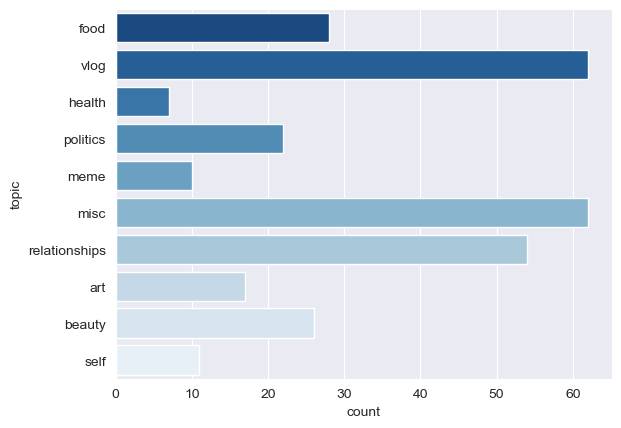

In [166]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

different_topics = labelled_df['manual_topic']
count = Counter(different_topics)

topics = [topic for topic in count]
height = [n for n in count.values()]
bar_df = pd.DataFrame()
bar_df['topic'] = topics
bar_df['count'] = height
sns.barplot(data=bar_df, x='count', y='topic', palette='Blues_r')

total_count = np.sum(np.array(height))
for t in count:
    print(f' The percentage for {t} is: {round(((count[t] / total_count) * 100), 2)}%')
